<img src='https://user-images.githubusercontent.com/6457691/90080969-0f758d00-dd47-11ea-8191-fa12fd2054a7.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 4 / SPRINT 2 / SC *

---
# Sprint Challenge - 신경망(Neural Network) 기본기 다지기

Table of Problems

1. 신경망 정의하기 
2. 퍼셉트론 정의
    - 퍼셉트론(Perceptron)
    - 다층 퍼셉트론(Multilayer Perceptron)
    - 분석과 비교
4. Keras 사용하기

In [1]:
# 1번 문제에 대한 레퍼런스는 제공되지 ß않습니다.
# 자신만의 언어로 주어진 키워드와 역전파를 설명해보세요.

<a id="Q2"></a>
## 2. 단순한 퍼셉트론

이번에는 텐서플로우, 케라스를 사용하여 두 개의 신경망을 직접 구축한 뒤,
<br> 아래 임의로 만든 $X, y$를 이용하여 두 모델에 적용한 뒤 결과를 비교해보세요. 먼저 사용할 데이터는 다음과 같습니다.

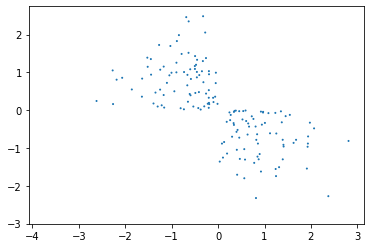

In [6]:
import numpy as np
import matplotlib.pyplot as plt

"Use this X & y in the following 2 models"
X = np.random.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), 
             dtype=int)

plt.scatter(X[:,0], X[:,1], s=y)

### 단순 퍼셉트론 구현
Keras를 이용하여 1개의 dense layer 와 sigmoid activation function를 이용하여 `model1`을 만들어 학습시키고 `h1`에 저장하세요.

In [38]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [39]:
model1 = Sequential(
    Dense(1, activation='sigmoid')
)

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

h1 = model1.fit(X, y)

10/10 [==============================] - 0s 2ms/step - loss: 0.7613 - accuracy: 0.4957



### Multi-Layer Perceptron
이번에는 여러층의 레이어들 만들어볼거에요. 아래는 간략한 가이드입니다 :
- 2개의 은닉층 (출력 수를 맞추는 것까지 3개의 Dense를 사용할 것은 추천)
- 노드의 개수는 8-32개 내에서 변경해서 사용해보세요.
- Activation function과 optimizer는 배운 것들 중에서 골라보세요.
- 아래 만들어진 Callback function을 모델에 통합해서 사용하세요

MLP로 만들어진 `model2` 를 만들어 학습하고 `h2`에 저장하세요.

In [40]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > .90):   
            self.model.stop_training = True

In [41]:
model2 = Sequential()
model2.add(Dense(32, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

h2 = model2.fit(X, y, epochs=20, callbacks=[myCallback()])

Epoch 1/20
10/10 [==============================] - 0s 2ms/step - loss: 0.7323 - accuracy: 0.2333
Epoch 2/20
10/10 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.6337
Epoch 3/20
10/10 [==============================] - 0s 2ms/step - loss: 0.6495 - accuracy: 0.7738
Epoch 4/20
10/10 [==============================] - 0s 2ms/step - loss: 0.6208 - accuracy: 0.8913
Epoch 5/20
10/10 [==============================] - 0s 2ms/step - loss: 0.5970 - accuracy: 0.8871


### Analyze and Compare

코드를 시작하기 전에 추가 라이브러리를 설치해야 합니다. 스프린트 과제에 사용 중인 환경에 패키지 `mlxtend`를 설치합니다. 설치코드를 직접 제작해보세요. 기존 자료들을 참고하면 쉽게 설치할 수 있을 것입니다. 

아래 셀은 모형의 의사결정 경계도("model1" 및 "model2")를 생성합니다. 그림을 검토합니다.

In [42]:
!pip install mlxtend

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


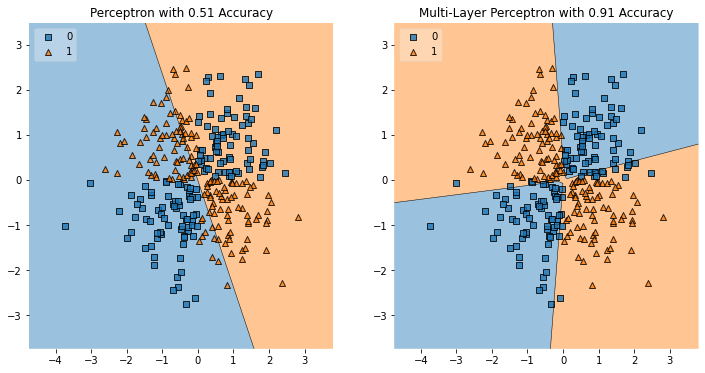

In [43]:
# Do Not change anything in this cell

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - .2, X[:, 0].max() + .2
y_min, y_max = X[:, 1].min() - .2, X[:, 1].max() + .2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

fig = plt.figure(figsize=(12,6))


for clf, hist, name, grd in zip([model1,model2], [h1, h2],['Perceptron', 'Multi-Layer Perceptron'],[1,2]):

    ax = plt.subplot(1,2, grd)
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    title = f"{name} with {hist.history['accuracy'][-1]:,.2f} Accuracy"
    plt.title(title)

plt.show()

- 단층 퍼셉트론(`model1`) : 선형 결정 경계만을 만들 수 있기 때문에 데이터의 결정 경계가 비선형인 경우 좋은 결과를 얻기 어렵다.
- 다층 퍼셉트론(`model2`) : Layer의 중첩을 통해 비선형 결정 경계를 만들 수 있기 때문에 높은 성능을 얻을 수 있다.

## 3. Keras MLP 튜닝

이번에는 Keras 라이브러리를 사용하여 선택한 MultiLayer Perceptron(MLP) 아키텍처를 구현해볼 거에요. 단순한 모델부터 복작한 모델까지 만들어 보실 수 있습니다. 모델을 학습하고 정확도를 구해보세요. 
<br> 그런 다음 최소 두 개의 파라미터를 튜닝하고 모형의 정확도를 구해보고 비교해보세요. 
<br> 아래 Cell에서 심장병 데이터 세트 사용(이진 분류) 이진 분류 작업에 적절한 손실 함수 사용 네트워크의 마지막 계층에서 적절한 활성화 함수를 사용합니다. 
<br> 세부적인 출력을 사용하여 빠르게 수렴할 수 있도록 모델을 학습해보는 것도 중요합니다. GridSearchCV 또는 RandomSearchCV를 사용하여 모델을 하이퍼 파라미터들을 튜닝해봅니다. (최소 두 개의 하이퍼 파라미터의 경우) 하이퍼 파라미터 튜닝 시 새로운 각 실험에 대해 코드 셀을 추가하여 작업하는 방법을 배워보았는데, 그대로 이용하지 말고 변형을 해서 보여주고 싶은 내용을 정리해서 보여주새요.  
<br> 테스트할 때 하이퍼 파라미터의 각 조합에 대한 정확도를 보고하여 가장 높은 정확도를 얻을 수 있는 결과를 쉽게 확인할 수 있도록 합니다. 
<br> 이 SC에서 3점을 얻으려면 최소 3개의 파라미터를 조정해야 합니다.

- BatchNormalization을 레이어에 추가하면 성능이 많이 오를 수 있습니다. 
- 위 기능을 사용하기 위해서는 Batch_size 옵션을 추가해야 합니다.

In [44]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/heart.csv')
df = df.sample(frac=1)
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
178,43,1,0,120,177,0,0,120,1,2.5,1,0,3,0
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
235,51,1,0,140,299,0,1,173,1,1.6,2,0,3,0
151,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
147,60,0,3,150,240,0,1,171,0,0.9,2,0,2,1


In [55]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

print(f"""{X.head()}
{y.head()}""")

     age  sex  cp  trestbps  chol  ...  exang  oldpeak  slope  ca  thal
178   43    1   0       120   177  ...      1      2.5      1   0     3
160   56    1   1       120   240  ...      0      0.0      0   0     2
235   51    1   0       140   299  ...      1      1.6      2   0     3
151   71    0   0       112   149  ...      0      1.6      1   0     2
147   60    0   3       150   240  ...      0      0.9      2   0     2

[5 rows x 13 columns]
178    0
160    1
235    0
151    1
147    1
Name: target, dtype: int64


In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [89]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

tf.random.set_seed(42)

def model_func(layer1_node=8, layer2_node=8, optimizer='sgd'):
    model_mlp = Sequential()
    model_mlp.add(Dense(layer1_node, activation='relu'))
    model_mlp.add(Dense(layer2_node, activation='relu'))
    model_mlp.add(Dense(1, activation='sigmoid'))

    model_mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model_mlp


cls_model = KerasClassifier(build_fn=model_func)

In [90]:
from sklearn.model_selection import GridSearchCV

layer1_nodes=(8, 16, 32)
layer2_nodes=(8, 16, 32)
optimizers=('sgd', 'rmsprop', 'adam')

param_grid = dict(layer1_node=layer1_nodes, layer2_node=layer2_nodes, optimizer=optimizers)

In [92]:
gridCV = GridSearchCV(estimator=cls_model, param_grid=param_grid, cv=5)
gridCV_result = gridCV.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
7/7 [==============================] - 0s 13ms/step - loss: 0.6616 - accuracy: 0.5800 - val_loss: 0.6644 - val_accuracy: 0.5738
Epoch 26/50
7/7 [==============================] - 0s 11ms/step - loss: 0.6846 - accuracy: 0.5906 - val_loss: 0.6488 - val_accuracy: 0.6066
Epoch 27/50
7/7 [==============================] - 0s 12ms/step - loss: 0.6146 - accuracy: 0.6113 - val_loss: 0.6125 - val_accuracy: 0.6721
Epoch 28/50
7/7 [==============================] - 0s 14ms/step - loss: 0.6275 - accuracy: 0.6317 - val_loss: 0.6686 - val_accuracy: 0.6066
Epoch 29/50
7/7 [==============================] - 0s 11ms/step - loss: 0.6949 - accuracy: 0.5886 - val_loss: 0.6097 - val_accuracy: 0.5902
Epoch 30/50
7/7 [==============================] - 0s 12ms/step - loss: 0.6731 - accuracy: 0.6479 - val_loss: 0.6488 - val_accuracy: 0.6393
Epoch 31/50
7/7 [==============================] - 0s 12ms/step - loss: 0.6304 - accuracy: 0.6661 - val_loss: 0.7213 - val_accuracy: 0.5

In [94]:
print(f"""Best Result : {gridCV_result.best_score_}
Parameter : {gridCV_result.best_params_}""")

Best Result : 0.7397959232330322
Parameter : {'layer1_node': 32, 'layer2_node': 16, 'optimizer': 'adam'}
